## 5. Pobrać ze strony kursu na platformie UPeL i wczytać do notebooka zbiór danych space.csv 

In [1]:
import pandas as pd

df = pd.read_csv('space.csv')

df.head()

,x,y,label
0,-0.854800,-0.010376,0.0
1,0.355699,-0.519722,0.0
2,0.095440,0.777868,0.0
3,0.931966,-0.055718,0.0
4,-0.105374,0.987070,0.0


## 6. Bez podziału na zbiór treningowy i testowy wytrenować modele w oparciu o metody z 3.

- drzewo decyzyjne,
- las losowy,
- regresje logistyczna,
- support vector machine,
- mulit-layer perceptron

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

X = df.drop('label', axis=1)
y = df['label']

dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
lr = LogisticRegression(random_state=42, max_iter=1000)
svm = SVC(random_state=42)
mlp = MLPClassifier(random_state=42, max_iter=1000)

models = [dt, rf, lr, svm, mlp]
model_names = ['Decision Tree', 'Random Forest', 'Logistic Regression', 'SVM', 'MLP']

results = []
for name, model in zip(model_names, models):
    model.fit(X, y)
    
    y_pred = model.predict(X) # Robimy predykcję na danych treningowych
    
    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y, y_pred),
        'Precision': precision_score(y, y_pred, pos_label=1.0),
        'Recall': recall_score(y, y_pred, pos_label=1.0),
        'F1': f1_score(y, y_pred, pos_label=1.0)
    })

results_df = pd.DataFrame(results)
results_df = results_df.set_index('Model')
results_df = results_df.round(4)

print("Wyniki treningu na całym zbiorze danych:")
print(results_df)

Wyniki treningu na całym zbiorze danych:
                     Accuracy  Precision  Recall      F1
Model                                                   
Decision Tree          1.0000     1.0000   1.000  1.0000
Random Forest          1.0000     1.0000   1.000  1.0000
Logistic Regression    0.5568     0.5568   1.000  0.7153
SVM                    0.9811     1.0000   0.966  0.9827
MLP                    0.9933     1.0000   0.988  0.9940


## 7. Zaimplementować (i jeśli potrzeba zdebugować) funkcje do rysowania dołączoną do zadania.

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    markers = ("o", "s", "^", "v", "<")
    colors = ("blue", "red", "lightgreen", "gray", "cyan")
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    x2_min, x2_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))

    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)

    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl].iloc[:, 0],
                    y=X[y == cl].iloc[:, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=f"Class {cl}",
                    edgecolor="black")

## 8. Wyrysować i porównać domeny otrzymane przy pomocy poszczególnych metod.

/Users/mateu/.pyenv/versions/3.12.5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


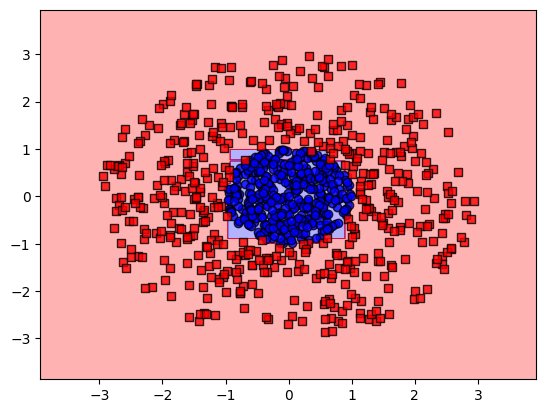

In [20]:
plot_decision_regions(X, y, dt)

/Users/mateu/.pyenv/versions/3.12.5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


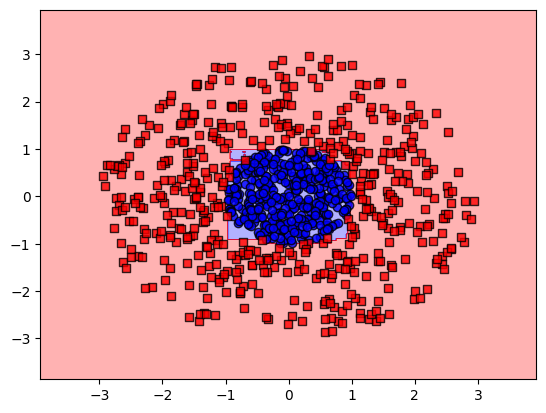

In [21]:
plot_decision_regions(X, y, rf)

/Users/mateu/.pyenv/versions/3.12.5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


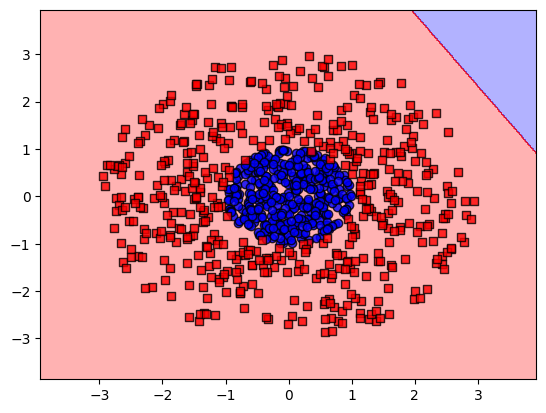

In [22]:
plot_decision_regions(X, y, lr)

/Users/mateu/.pyenv/versions/3.12.5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


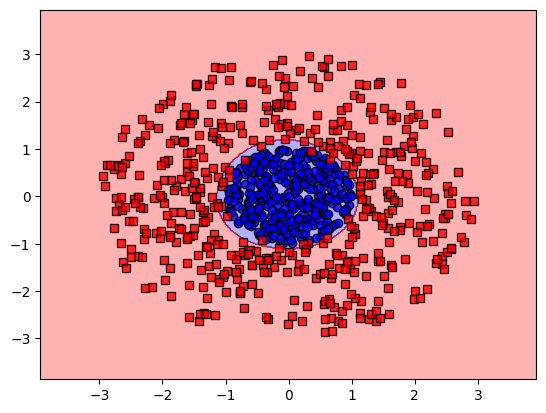

In [23]:
plot_decision_regions(X, y, svm)

/Users/mateu/.pyenv/versions/3.12.5/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


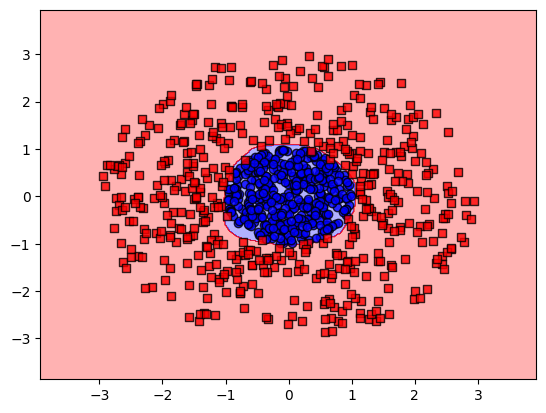

In [24]:
plot_decision_regions(X, y, mlp)

## 9. Przygotować się do dyskusji w jaki sposób różne metody dzielą przestrzeń cech podczas klasyfikacji.

### 9.1. Decision Tree (Drzewo decyzyjne):
- Tworzy prostokątne obszary decyzyjne
- Granice decyzyjne są zawsze równoległe do osi
- Widoczne ostre, "schodkowe" przejścia między klasami
- Może tworzyć skomplikowane granice, ale zawsze w formie prostokątnych regionów
### 9.2. Random Forest (Las losowy):
- Podobnie jak drzewo tworzy prostokątne regiony
- Granice są bardziej "rozmyte" niż w pojedynczym drzewie
Łagodniejsze przejścia między klasami dzięki uśrednianiu wielu drzew
- Zwykle daje bardziej stabilne i gładsze granice niż pojedyncze drzewo
### 9.3. Logistic Regression (Regresja logistyczna):
- Tworzy liniową granicę decyzyjną
- Jedna prosta linia (lub hiperpłaszczyzna w wyższych wymiarach)
- Nie może uchwycić nieliniowych zależności
- Najlepiej sprawdza się gdy klasy są liniowo separowalne
### 9.4. SVM (Support Vector Machine):
- Z kernelem RBF (domyślnym) tworzy nieliniowe, gładkie granice
- Granice decyzyjne są zwykle bardziej regularne niż w przypadku drzew
- Może tworzyć złożone, ale "naturalne" kształty regionów
- Dobrze radzi sobie z nieliniowymi wzorcami
### 9.5. MLP (Multi-Layer Perceptron):
- Może tworzyć bardzo złożone, nieliniowe granice
- Granice są zwykle gładkie
- Kształt granic zależy od architektury sieci
- Może się dostosować do prawie dowolnego wzorca w danych

### Kluczowe obserwacje:
- Metody liniowe (regresja logistyczna) są najprostsze, ale często niewystarczające
- Drzewa tworzą "kanciaste" granice, co może być nieoptymalne dla gładkich wzorców
- SVM i MLP tworzą bardziej naturalne, gładkie granice
- Random Forest oferuje dobry kompromis między złożonością a interpretowalnością

## 10. Dla losowej dystrybucji danych 2D wygenerowac klasteryzację danych używając metody K-mean i zwizualizować. Kod można napisać samemu lub skorzystać z istniejących narzędzi (np. link)

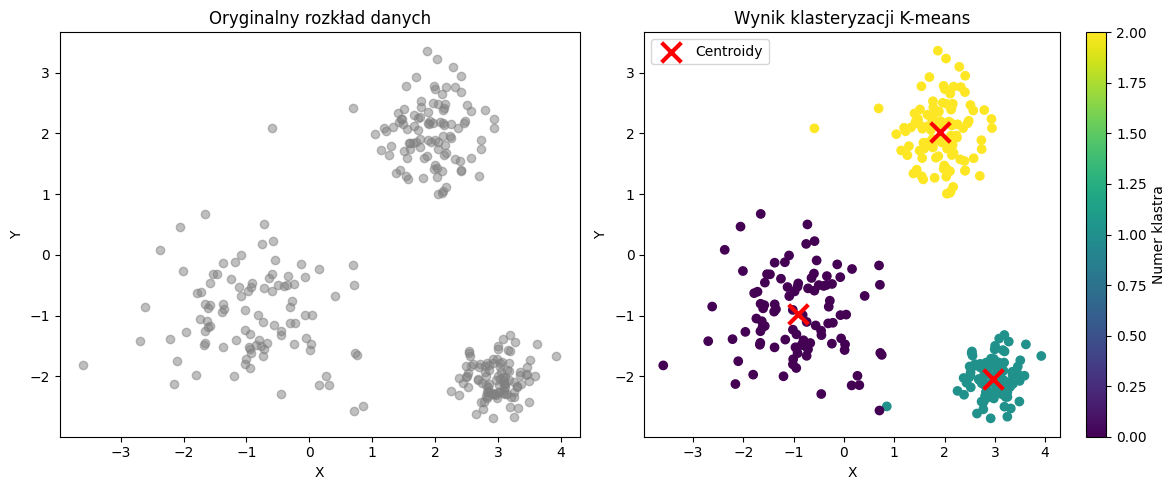

Klaster 0: 98 punktów
Klaster 1: 101 punktów
Klaster 2: 101 punktów


In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Generowanie losowych danych 2D
np.random.seed(42)
n_samples = 300

# Generujemy dane z trzech różnych rozkładów normalnych
cluster1 = np.random.normal(loc=[2, 2], scale=0.5, size=(n_samples//3, 2))
cluster2 = np.random.normal(loc=[-1, -1], scale=0.8, size=(n_samples//3, 2))
cluster3 = np.random.normal(loc=[3, -2], scale=0.3, size=(n_samples//3, 2))

# Łączymy dane
X = np.vstack([cluster1, cluster2, cluster3])

# Klasteryzacja K-means
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X)

# Wizualizacja wyników
plt.figure(figsize=(12, 5))

# Oryginalny rozkład
plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], c='gray', alpha=0.5)
plt.title('Oryginalny rozkład danych')
plt.xlabel('X')
plt.ylabel('Y')

# Wynik klasteryzacji
plt.subplot(122)
scatter = plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], 
           kmeans.cluster_centers_[:, 1], 
           c='red', 
           marker='x', 
           s=200, 
           linewidth=3, 
           label='Centroidy')
plt.title('Wynik klasteryzacji K-means')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.colorbar(scatter, label='Numer klastra')

plt.tight_layout()
plt.show()

# Wyświetlenie informacji o klastrach
for i in range(n_clusters):
    print(f"Klaster {i}: {np.sum(cluster_labels == i)} punktów")